# Retweet prediction from twitter dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_excel("3879190491209924863.xlsx")

In [3]:
df.head()

,TweetPostedTime,TweetID,TweetBody,TweetRetweetFlag,TweetSource,TweetInReplyToStatusID,TweetInReplyToUserID,TweetInReplyToScreenName,TweetRetweetCount,TweetFavoritesCount,...,UserDescription,UserLink,UserExpandedLink,UserFollowersCount,UserFriendsCount,UserListedCount,UserSignupDate,UserTweetCount,MacroIterationNumber,tweet.place
0,Tue Dec 20 10:57:00 +0000 2016,811163485052817408,RT @BeachyMaldives: Local interaction is a gre...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,1,0,...,Pls donate 2 https://t.co/RvOUK9lAWI #YearEndG...,https://t.co/jghZVBsiQF,http://cjqenterprises.com,6334,6144,1917,Sun Jun 14 22:36:15 +0000 2015,33556,0,NaN
1,Tue Dec 20 10:56:59 +0000 2016,811163483463122944,RT @TechTerraEd: Need #giftideas for your kid(...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,1,0,...,"Educator of students with special needs, Mothe...",NaN,NaN,154,371,180,Sat Jan 02 13:36:23 +0000 2010,3201,0,NaN
2,Tue Dec 20 10:56:55 +0000 2016,811163466387988480,Seven Questions Before Choosing a Cruise Line ...,False,"<a href=""http://www.google.com/"" rel=""nofollow...",NaN,NaN,NaN,0,0,...,Thrifty Mom Media social media consulting and ...,https://t.co/cEhGzaQJp6,http://www.thriftymommastips.com/,23433,24762,961,Tue May 26 21:26:09 +0000 2009,147958,0,NaN
3,Tue Dec 20 10:56:55 +0000 2016,811163465125679104,"RT @CMGsportsclub: Yoga do Brasil, un havre de...",True,"<a href=""https://roundteam.co"" rel=""nofollow"">...",NaN,NaN,NaN,1,0,...,"Adventure travel, yoga, paleo, Crossfit, runni...",https://t.co/3IHwXkgAkA,https://primalsanctuary.com,11136,10081,978,Sat Sep 12 20:29:18 +0000 2015,28988,0,NaN
4,Tue Dec 20 10:56:53 +0000 2016,811163457508642817,"RT @StylishRentals: Love this! ""Palm Springs M...",True,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,NaN,3065,0,...,I really have got giant ambitions. I start com...,NaN,NaN,55,21,31,Wed Sep 07 16:22:15 +0000 2016,19581,0,NaN


## Dropping empty columns

In [4]:
drop=[]
for column in df.columns:
    if (df[column].isnull().sum()>(df.shape[0])/2):
        drop.append(column)

In [5]:
drop

['TweetInReplyToStatusID',
 'TweetInReplyToUserID',
 'TweetInReplyToScreenName',
 'TweetPlaceID',
 'TweetPlaceName',
 'TweetPlaceFullName',
 'TweetCountry',
 'TweetPlaceBoundingBox',
 'TweetPlaceAttributes',
 'TweetPlaceContainedWithin',
 'UserLink',
 'UserExpandedLink',
 'tweet.place']

In [6]:
df=df.drop(drop,axis=1)

In [7]:
df.head()

,TweetPostedTime,TweetID,TweetBody,TweetRetweetFlag,TweetSource,TweetRetweetCount,TweetFavoritesCount,TweetHashtags,UserID,UserName,UserScreenName,UserLocation,UserDescription,UserFollowersCount,UserFriendsCount,UserListedCount,UserSignupDate,UserTweetCount,MacroIterationNumber
0,Tue Dec 20 10:57:00 +0000 2016,811163485052817408,RT @BeachyMaldives: Local interaction is a gre...,True,"<a href=""http://twitter.com/download/iphone"" r...",1,0,"Maldives, vacation, travel",3325724261,CjQenterprises,CjQenterprises,United States,Pls donate 2 https://t.co/RvOUK9lAWI #YearEndG...,6334,6144,1917,Sun Jun 14 22:36:15 +0000 2015,33556,0
1,Tue Dec 20 10:56:59 +0000 2016,811163483463122944,RT @TechTerraEd: Need #giftideas for your kid(...,True,"<a href=""http://twitter.com/download/iphone"" r...",1,0,"giftideas, holiday",101222953,monica,mama0004,durham nc,"Educator of students with special needs, Mothe...",154,371,180,Sat Jan 02 13:36:23 +0000 2010,3201,0
2,Tue Dec 20 10:56:55 +0000 2016,811163466387988480,Seven Questions Before Choosing a Cruise Line ...,False,"<a href=""http://www.google.com/"" rel=""nofollow...",0,0,"travel, TTOT",42725028,Paula Schuck,inkscrblr,Canada,Thrifty Mom Media social media consulting and ...,23433,24762,961,Tue May 26 21:26:09 +0000 2009,147958,0
3,Tue Dec 20 10:56:55 +0000 2016,811163465125679104,"RT @CMGsportsclub: Yoga do Brasil, un havre de...",True,"<a href=""https://roundteam.co"" rel=""nofollow"">...",1,0,"yoga, bresil, meditation, holiday",3541532718,Primal Sanctuary,primalsanctuary,"Cypress, Texas, USA","Adventure travel, yoga, paleo, Crossfit, runni...",11136,10081,978,Sat Sep 12 20:29:18 +0000 2015,28988,0
4,Tue Dec 20 10:56:53 +0000 2016,811163457508642817,"RT @StylishRentals: Love this! ""Palm Springs M...",True,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",3065,0,Travel,773556998034063360,Joe,biryukovasever2,Providence,I really have got giant ambitions. I start com...,55,21,31,Wed Sep 07 16:22:15 +0000 2016,19581,0


In [8]:
df.columns

Index(['TweetPostedTime', 'TweetID', 'TweetBody', 'TweetRetweetFlag',
       'TweetSource', 'TweetRetweetCount', 'TweetFavoritesCount',
       'TweetHashtags', 'UserID', 'UserName', 'UserScreenName', 'UserLocation',
       'UserDescription', 'UserFollowersCount', 'UserFriendsCount',
       'UserListedCount', 'UserSignupDate', 'UserTweetCount',
       'MacroIterationNumber'],
      dtype='object')

## EDA & Feature engineering

### 1.Tweet posted time

In [9]:
import datetime

Extracted hour time at which tweet was tweeted

In [10]:
df['Time'] =[datetime.datetime.strptime(d, '%a %b %d %H:%M:%S %z %Y') for d in df['TweetPostedTime']]
df['Time'] = [d.hour for d in df['Time']] 
no_of_tweets=df['Time'].value_counts()

 Plotting bar graph to see at what hour maximum tweets are twitted

In [11]:
import seaborn as sns

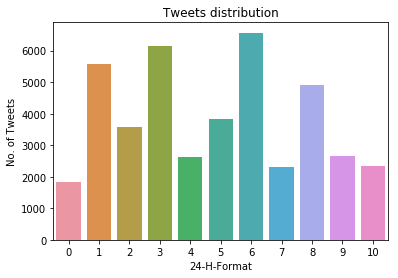

In [12]:
ax=sns.barplot(y=no_of_tweets.values, x=no_of_tweets.index)
ax.set(xlabel='24-H-Format', ylabel='No. of Tweets',title='Tweets distribution')

Inference from above graph:
1. Clearly at 6 Am maximum tweets were retwetted while 1,3 and 8 am also being peak hours.
2. Least retweets are made between 12 am to 1 am.

### 2. Tweet Body and Tweet Retweet Flag

In [13]:
Retweets = df[df['TweetRetweetFlag'] == True]
print(f"The percentage of retweets is {round(len(Retweets)/len(df)*100)}% of all the tweets")

The percentage of retweets is 63% of all the tweets


In [14]:
NoRetweets= df[df['TweetRetweetFlag'] == False]
print(f"The percentage of tweets without retweet is {round(len(NoRetweets)/len(df)*100)}% of all the tweets")

The percentage of tweets without retweet is 37% of all the tweets


#### A tweet is more likely to be retweeted if it has hashtags and other users mentioned , let's see what pattern this data has

In [15]:
RT_M = df[ (df['TweetBody'].str.count("@") == 2) & (df['TweetRetweetFlag'] == True) ]
print(f"The percentage of retweets with mentions is {round(len(RT_M)/len(Retweets)*100)}% of all the Retweets")

The percentage of retweets with mentions is 64% of all the Retweets


In [16]:
RT_NM=df[(df['TweetRetweetFlag'] == True)& (df['TweetBody'].str.count("@") != 2)]
print(f"The percentage of retweets without mentions is {round(len(RT_NM)/len(Retweets)*100)}% of all the Retweets")

The percentage of retweets without mentions is 36% of all the Retweets


#### Clearly tweets with user mentions has high percentage to be retweeted 

In [17]:
RT_H=df[(df['TweetRetweetFlag'] == True)& df['TweetBody'].str.contains("#")]
print(f"The percentage of retweets with hashtags is {round(len(RT_H)/len(Retweets)*100)}% of all the Retweets")

The percentage of retweets with hashtags is 100% of all the Retweets


In [18]:
RT_NH=df[(df['TweetRetweetFlag'] == True)& (~df['TweetBody'].str.contains("#"))]
print(f"The percentage of retweets without hashtags is {round(len(RT_NH)/len(Retweets)*100)}% of all the Retweets")

The percentage of retweets without hashtags is 0% of all the Retweets


#### Percentage of retweets with hashtags is 100% which shows hashtags has a major impact on a tweet to be retweeted for this dataset

In [20]:
NRT_H=df[(df['TweetRetweetFlag'] == False)& df['TweetBody'].str.contains("#") ]
print(f"The percentage of tweets without retweet and with hashtags is {round(len(NRT_H)/len(NoRetweets)*100)}% of all the Retweets")

The percentage of tweets without retweet and with hashtags is 99% of all the Retweets


#### But tweets which were not retweeted but has hashtags are 99% , which implies almost all tweets which were not retweeted had hashtags , so hashtag is not that good feature for this dataset 
#### Below is a bar graph for the same

In [21]:
t_y = [ len(Retweets), len(NoRetweets),len(RT_M), len(RT_NM), len(RT_H),len(RT_NH),len(RT_H)]
t_x = ['RT','NRT', 'Mentions', 'No_Menitions ', 'Hashtags' ,'No_Hashtags','              NRT_Hashtags']

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

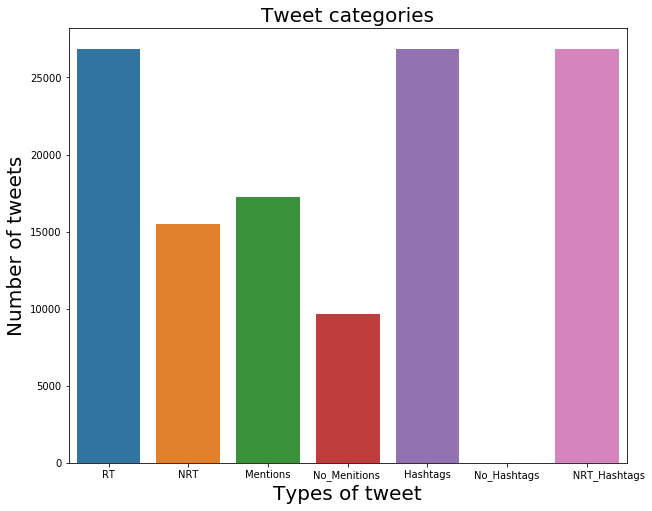

In [23]:
plt.figure(figsize=(10,8))
plt.title('Tweet categories', fontsize = 20)
plt.xlabel('Types of tweet',fontsize = 20)
plt.ylabel('Number of tweets',fontsize = 20)
sns.barplot(x = t_x, y = t_y)

plt.show()

&emsp;&emsp;RT- Tweets which are retweeted
<br>
&emsp;&emsp;NRT - Tweets which are not retweeted
<br>
&emsp;&emsp;Mentions - Retweeted tweet with mentions
<br>
 &emsp;&emsp;No_mentions - Retweeted tweet without mentions
<br>
 &emsp;&emsp;Hashtags - Retweeted tweet with hashtags
<br>
 &emsp;&emsp;No_Hashtags - Retweeted tweet without hashtags
<br>
 &emsp;&emsp;NRT_Hashtags - Tweets which are not retweeted but had hashtags                                    

### 3. TweetSource
#### From tweet source, extracted the type of device from which retweet was posted and plotted a bar graph to see which device is used more .

In [24]:
Retweets['TweetSource']=Retweets['TweetSource'].apply(lambda x :x.split('>')[1].split('<')[0])

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
Retweets['TweetSource']=Retweets['TweetSource'].apply(lambda x :x.lower())

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
Web=Retweets[Retweets['TweetSource'].str.contains("web")]
Web_l=len(Web)
iPhone_iPad=Retweets[Retweets['TweetSource'].str.contains("iphone") | Retweets['TweetSource'].str.contains("ipad")]
iPhone_l=len(iPhone_iPad)
Android=Retweets[Retweets['TweetSource'].str.contains("android")]
Android_l=len(Android)
App=Retweets[Retweets['TweetSource'].str.contains("app")]
App_l=len(App)
Instagram_Facebook=Retweets[Retweets['TweetSource'].str.contains("instagram") | Retweets['TweetSource'].str.contains("facebook")]
Insta_Fb=len(Instagram_Facebook)

In [27]:
Bot=Retweets[Retweets['TweetSource'].str.contains("bot")]
Bot_l=len(Bot)
drop=pd.concat([Web,App,iPhone_iPad,Android,Instagram_Facebook,Bot])
other_websites=Retweets.drop(index=drop.index)
web_apps=len(other_websites)

In [28]:
r_y = [Web_l,App_l,iPhone_l,Android_l,Insta_Fb,Bot_l,web_apps]
r_x = ['Web','Apps','iPhone_iPad','Android','Insta_Fb','Bot','other_webApps']

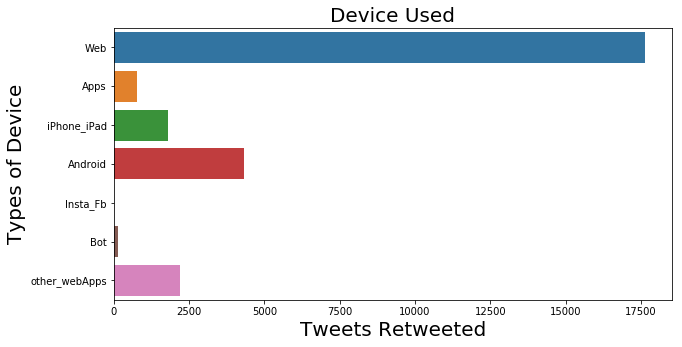

In [29]:
plt.figure(figsize=(10,5))
plt.title('Device Used', fontsize = 20)
plt.ylabel('Types of Device',fontsize = 20)
plt.xlabel('Tweets Retweeted',fontsize = 20)
sns.barplot(x = r_y, y = r_x)

plt.show()

    From the above graph we can see, mostly Web browsers are used than mobiles and other apps.

### 4. TweetFavoritesCount - 
###### No of tweets user has liked <br> Let's see if it has any relation with number of retweets
###### As retweet count is a continuous variableand this is a regression problem, we will try to see if it has a correlation with any feature and I have plotted graphs accordingly  

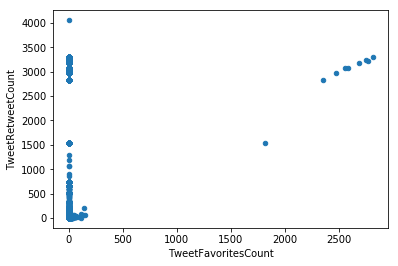

In [30]:
df.plot(kind='scatter', x='TweetFavoritesCount', y='TweetRetweetCount')

#### Clearly no relation is seen between this two features

### 5. Hashtags
#### I have created a new column (Hashtags_count) which has count of hashtags used in a tweet<br>As we saw hashtag was not a great feature , let's see it visually. 

In [31]:
Hashtags_count = []
df.TweetHashtags.fillna("no",inplace=True)
for i in range(len(df.TweetHashtags)):
    if df.TweetHashtags[i]== "no":
        Hashtags_count.append(0)
    else:
        Hashtags_count.append((len([j for j in df.TweetHashtags[i].split(",")])))

In [32]:
df['hashtag_count']=Hashtags_count

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


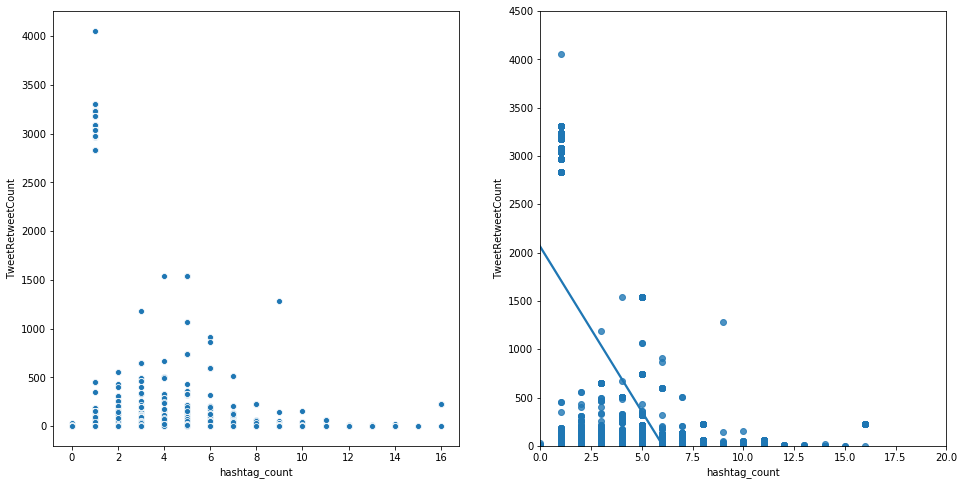

In [33]:
f, axes = plt.subplots(1,2, figsize=(16, 8))

sns.scatterplot(x=df['hashtag_count'],y=df['TweetRetweetCount'],data=df,ax=axes[0])
sns.regplot(x=df['hashtag_count'],y=df['TweetRetweetCount'], ax=axes[1]).set(xlim=(0,20),ylim=(0,4500))
plt.show()

#### This scatter plot shows expecteed result. Infact it shows a negative regression line.

### 6. UserFollowersCount - No. of followers of a user.
####      More the no. of followers more should be the retweet count

(20000, 25000)

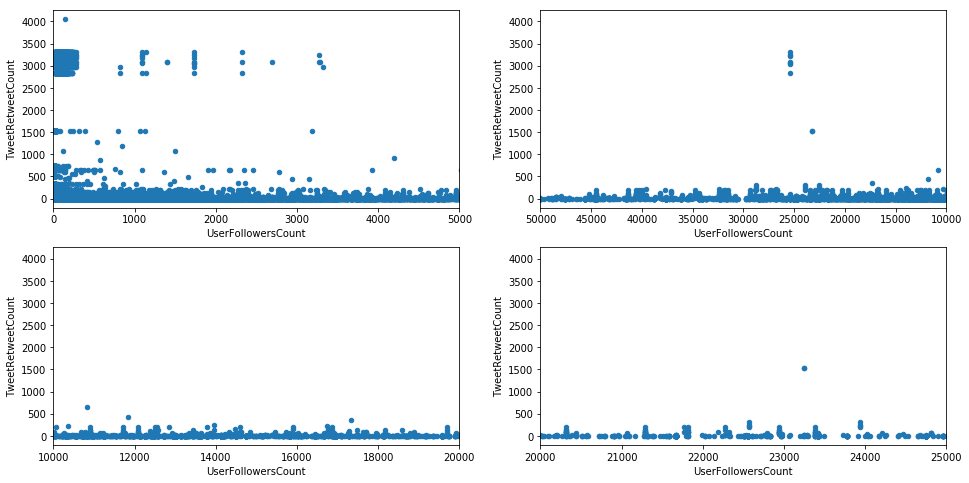

In [34]:
fig, axs = plt.subplots(2, 2)
df.plot(kind='scatter', x='UserFollowersCount', y='TweetRetweetCount',ax=axs[0,0],figsize=(16,8))
df.plot(kind='scatter', x='UserFollowersCount', y='TweetRetweetCount', ax=axs[0,1])
df.plot(kind='scatter', x='UserFollowersCount', y='TweetRetweetCount', ax=axs[1,0])
df.plot(kind='scatter', x='UserFollowersCount', y='TweetRetweetCount', ax=axs[1,1])
axs[0,0].set_xlim(0,5000)
axs[0,1].set_xlim(50000,10000)
axs[1,0].set_xlim(10000,20000)
axs[1,1].set_xlim(20000,25000)


#### I have plotted graph for different range of followers , still user followers count does not show and good relation with retweet count for this dataset

#### Next I have plotted graphs for features - Friends count , Listed Count , Tweet count and MacoIterationNumber w.r.t retweet count to see the relation.

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


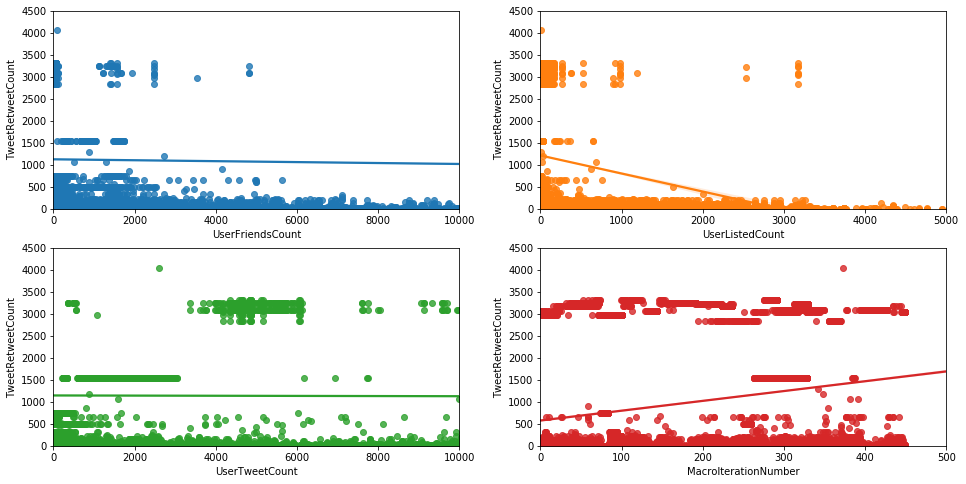

In [35]:
f, axes = plt.subplots(2, 2, figsize=(16, 8))
sns.regplot(x=df['UserFriendsCount'],y=df['TweetRetweetCount'] ,ax=axes[0, 0]).set(xlim=(0,10000),ylim=(0,4500))
    
sns.regplot(x=df['UserListedCount'],y=df['TweetRetweetCount'], ax=axes[0, 1]).set(xlim=(0,5000),ylim=(0,4500))

sns.regplot(x=df['UserTweetCount'],y=df['TweetRetweetCount'], ax=axes[1, 0]).set(xlim=(0,10000),ylim=(0,4500))

sns.regplot(x=df['MacroIterationNumber'],y=df['TweetRetweetCount'], ax=axes[1, 1]).set(xlim=(0,500),ylim=(0,4500))

plt.show()

#### we can see from the graphs that  no feature has a major impact on retweet count

#### From UserSignupDate I have sliced the year of sign up<br>The older the user the chances for tweet to be retweeted should be more

In [36]:
df['UserSignupYear']=df['UserSignupDate'].apply(lambda x:x[-4:])
df['UserSignupYear']=df['UserSignupYear'].astype(int)
df['UserSignupYear'].head()

0    2015
1    2010
2    2009
3    2015
4    2016
Name: UserSignupYear, dtype: int64

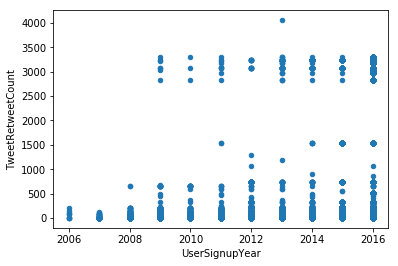

In [37]:
df.plot(kind='scatter', x='UserSignupYear', y='TweetRetweetCount')

####  But this feature also does not show good correlation<br><br>No feature is showing the expected relation  , the reason being that this data is only for few hours of one day. 

#### Let's see correlation of each feature visually

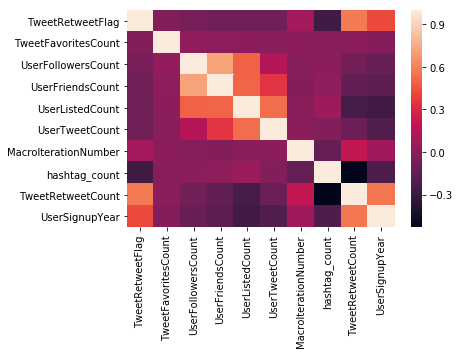

In [38]:
corr=df[['TweetRetweetFlag','TweetFavoritesCount','UserFollowersCount','UserFriendsCount','UserListedCount',
         'UserTweetCount','MacroIterationNumber','hashtag_count','TweetRetweetCount','UserSignupYear']]

heat=corr.corr()

sns.heatmap(heat)

In [39]:
df_final=corr
df_final['TweetRetweetFlag']= df_final['TweetRetweetFlag'].astype(int)
df_final.head()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,TweetRetweetFlag,TweetFavoritesCount,UserFollowersCount,UserFriendsCount,UserListedCount,UserTweetCount,MacroIterationNumber,hashtag_count,TweetRetweetCount,UserSignupYear
0,1,0,6334,6144,1917,33556,0,3,1,2015
1,1,0,154,371,180,3201,0,2,1,2010
2,0,0,23433,24762,961,147958,0,2,0,2009
3,1,0,11136,10081,978,28988,0,4,1,2015
4,1,0,55,21,31,19581,0,1,3065,2016


## Data normalisation

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_final)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

## Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X=df_final.drop('TweetRetweetCount',axis=1)
Y= df_final.TweetRetweetCount

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [42]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred0=lr.predict(X_test)

In [43]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [44]:
np.sqrt(mean_squared_error(y_test, y_pred0))

903.4677647577286

In [45]:
mean_absolute_error(y_test, y_pred0)

767.3091419951367

In [47]:
r2_score(y_test,y_pred0)

0.6027139966413005

#### Accuracy for linear regression model 60.67% which is good for this dataset

## Support Vector Regression

In [48]:
from sklearn.svm import SVR

In [49]:
clf = SVR(kernel='rbf')
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [50]:
y1_pred=clf.predict(X_test)

In [51]:
np.sqrt(mean_squared_error(y_test, y1_pred))

1784.2562606646718

In [52]:
mean_absolute_error(y_test, y1_pred)

1076.2329795356131

In [53]:
r2_score(y_test,y1_pred)

-0.5495029232004438

#### support vector regression gets negative R2 value , R2 is negative only when the chosen model does not follow the trend of the data, so fits worse than a horizontal line

## Random Forest Regression

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [56]:
y2_pred=rf.predict(X_test)

In [57]:
np.sqrt(mean_squared_error(y_test, y2_pred))

129.34489477253018

In [58]:
mean_absolute_error(y_test, y2_pred)

18.831400238554544

In [59]:
r2_score(y_test,y2_pred)

0.9918571483074474

#### Random forest regression gives 99.20% accuracy 

In [60]:
print("Actual vs Predicted using Random Forest")
pd.DataFrame({'Predicted Retweet':y2_pred,'Actual Retweets':y_test})

Actual vs Predicted using Random Forest


,Predicted Retweet,Actual Retweets
18826,0.000000,0
37862,3086.000000,3086
16605,3241.000000,3241
37329,3086.000000,3086
31940,0.000000,0
23640,0.000000,0
35352,34.300000,3
27762,1536.000000,1536
26123,3309.000000,3309
40061,3086.000000,3086


## Polynomial Regression

In [61]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2, interaction_only=True)
output_nparray = poly.fit_transform(df_final)
output_df = pd.DataFrame(output_nparray)

X1=output_df

In [62]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y, test_size=0.3)
lr1=LinearRegression()
lr1.fit(X1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [63]:
y3_pred=lr1.predict(X1_test)

In [64]:
np.sqrt(mean_squared_error(y1_test, y3_pred))

1.9955709782944375e-07

In [65]:
mean_absolute_error(y1_test, y3_pred)

1.4382075292054517e-08

In [66]:
r2_score(y1_test,y3_pred)

1.0

## Polynomial Regression model gives 100% accuracy!!

In [67]:
print("Actual vs Predicted using Random Forest")
pd.DataFrame({'Predicted Retweet':y3_pred,'Actual Retweets':y1_test})

Actual vs Predicted using Random Forest


,Predicted Retweet,Actual Retweets
21852,3.180000e+03,3180
35112,2.200000e+01,22
28089,1.536000e+03,1536
19236,1.300000e+01,13
418,5.664275e-10,0
33222,1.478930e-08,0
5757,1.000000e+00,1
25265,1.110000e+02,111
2282,2.223854e-08,0
22991,1.100000e+01,11


In [68]:
Eva_Mtx={'Model':['Linear Regression','Support Vector Regressor','Random Forest Regressor','Polynomial Regression' ],'RMSE':'NA','MEA':'NA','R_Square':'NA'}
Eva_Mtx=pd.DataFrame(Eva_Mtx)
Eva_Mtx.set_index(['Model'],inplace=True)
Eva_Mtx

,RMSE,MEA,R_Square
Model,,,
Linear Regression,NA,NA,NA
Support Vector Regressor,NA,NA,NA
Random Forest Regressor,NA,NA,NA
Polynomial Regression,NA,NA,NA


In [69]:
yh=[lr.predict(X_test),clf.predict(X_test),rf.predict(X_test)]

In [70]:
for n in range(0,1):
    for m in range(0,4):
        if(m==3):
            Eva_Mtx.iloc[m][n]=np.sqrt(mean_squared_error(y1_test, y3_pred))
            break
            
        Eva_Mtx.iloc[m][n]=np.sqrt(mean_squared_error(y_test, yh[m]))
        
for n in range(1,2):
    for m in range(0,4):
        if(m==3):
            Eva_Mtx.iloc[m][n]=mean_absolute_error(y1_test, y3_pred)
            break
            
        Eva_Mtx.iloc[m][n]=mean_absolute_error(y_test, yh[m])

for n in range(2,3):
    for m in range(0,4):
        if(m==3):
            Eva_Mtx.iloc[m][n]=r2_score(y1_test, y3_pred)
            break
            
        Eva_Mtx.iloc[m][n]=r2_score(y_test, yh[m])        
        
Eva_Mtx

,RMSE,MEA,R_Square
Model,,,
Linear Regression,903.468,767.309,0.602714
Support Vector Regressor,1784.26,1076.23,-0.549503
Random Forest Regressor,129.345,18.8314,0.991857
Polynomial Regression,1.99557e-07,1.43821e-08,1


## Polynomial Regression model is best for this dataset.

## Thank you!